# Covid-19 Testing Importance

## Introduction

I believe that testing is one of the most crucial parts of dealing with an epidemic virus. Testing helps us identify and isolate positive cases. The more tests you perform, the faster you isolate the case preventing them from coming into contact with others, **slowing the rate of transmission**.  

This will be performed by "merging" the information of two data sources:
* [Our World In Data Covid-19 Tests](https://ourworldindata.org/coronavirus-testing-source-data) for the number of tests of each country
* [John Hopkins Datasets](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) for the cases, recovered and deaths of each country 
  
**Date this notebook was written: 23/3/2020**  
  
**Disclaimer**: *In any way I do not want to point my finger on the governments and people of countries. It is not possible to know what were the reasons and the circumstances that lead to a lack of testing. My only target is to see if the data suggests that testing has a major role on this specific epidemic.*

In [80]:
import requests
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

from bs4 import BeautifulSoup

## Data sources

The first thing we want to find is **how many tests** have been performed on each country. The data will be extracted from this page: https://ourworldindata.org/coronavirus-testing-source-data . You may observe that the dates of last report are not the same for each country. This will be taken into account.

In [30]:
response = requests.get('https://ourworldindata.org/coronavirus-testing-source-data')
soup = BeautifulSoup(response.content)

table_soup = soup.find("div", {"class": "tableContainer"}).findAll("tr")[1:] # skip the headers
# RegEx to extract the country name, number of test, date
reg = re.compile("<tr><td>(.+)<\/td><td>([\d,]+)<\/td><td>([\w\s]+)<\/td><td>.*<\/td><td>.*<\/td><\/tr>")
testing_data = []
for row in table_soup:
    reg_res = reg.match(str(row))
    if reg_res is not None:
        testing_data.append(reg_res.groups())
    else:
        # Print the rows that failed to be parsed
        print(row)
    

# Create the dataframe
testing_df = pd.DataFrame(testing_data, columns=["Country", "Tests", "Date"])
testing_df['Tests'] = testing_df['Tests'].str.replace(',','').astype(int)    # Transform the x,xxx string to integers
testing_df['Date'] = pd.to_datetime(testing_df['Date'])    # Cast Date from string to date type

# Set country name as index of dataframe
testing_df = testing_df.set_index('Country', drop=False)

# For Canada and Australia we have info about specific regions
# Since on this notebook we will examine country response we merge them

# Australia
testing_df = testing_df[~testing_df.Country.str.contains("Australia –")]

# Canada
testing_df = testing_df[~testing_df.Country.str.contains("Canada –")]

# Usa has two trackers I will keep the most recent one (at least on the time of writing)
testing_df = testing_df.drop('United States – CDC samples tested')

testing_df = testing_df.drop("Hong Kong")

# We rename some countries so as to have the expected country name with the John Hopkins dataset
testing_df = testing_df.rename({
    "China – Guangdong": "China",
    "United States": "US",
    "Czech Republic": "Czechia",
    "South Korea": "Korea, South",
    "Taiwan": "Taiwan*",
    "Faeroe Islands":"Faroe Islands"
})

# Drop Palestine since it is not included on the John Hopkins dataset
testing_df = testing_df.drop("Palestine")

# Drop Faroe Islands since they are merged with Denmark
testing_df = testing_df.drop("Faroe Islands")

testing_df = testing_df.drop('Country', axis=1)

display(testing_df)

<tr><td>Canada</td><td></td><td></td><td></td><td></td><td>An aggregate figure for Canada is not provided given that the extent to which double-counting between the provincial labs and the national lab (NML) is unclear. See province level data and that for NML above. No figures have yet been found for Nunavut, Manitoba, Yukon and Newfoundland and Labrador provinces (collectively ~5% of population).</td></tr>
<tr><td>Kuwait</td><td></td><td>17 Mar 2020</td><td><a href="https://drive.google.com/file/d/1pVBq-c4HLeUis_BS58xT_jJTJZni2JfR/view?usp=sharing" rel="noreferrer noopener" target="_blank">Communication from International Press Office at the Ministry of Information in the State of Kuwait, 17 March 2020.</a></td><td>17 Mar 2020</td><td>In an earlier version of this dataset we reported an estimate of 120,000 tests based on an official letter sent to us by the Ministry of Information. After this, they sent a second email correcting their estimate to 27,000, and then a further correction

,Tests,Date
Country,,
Armenia,813,2020-03-18
Australia,113615,2020-03-20
Austria,15613,2020-03-20
Bahrain,18645,2020-03-20
Belarus,16000,2020-03-16
Belgium,18360,2020-03-18
Brazil,2927,2020-03-13
China,320000,2020-02-24
Colombia,4103,2020-03-20


Next we must find info like confirmed cases, recovered cases, deaths for each country above.  
The dataset used will be the [John Hopkin's one](https://github.com/CSSEGISandData/COVID19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv).


In [32]:
def transform_date_to_str(date_str):
    if date_str[8] != '0':
        return date_str[6:7] + "/" + date_str[8:10] + "/20"
    else:
        return date_str[6:7] + "/" + date_str[9:10] + "/20"

def read_john_hopkins_dataset(url, column_name):
    john_hopkins_df = pd.read_csv(url, index_col=['Country/Region'])
    john_hopkins_df = john_hopkins_df.drop('Lat', axis=1)
    john_hopkins_df = john_hopkins_df.drop('Long', axis=1)

    # We must sum the cases on countries that are displayed by region eg US and China
    john_hopkins_df_grouped = john_hopkins_df.groupby(['Country/Region']).sum()

    testing_df[column_name] = np.nan
    for index, row in testing_df.iterrows():
        try:
            testing_df.at[index, column_name] = john_hopkins_df_grouped.loc[index][transform_date_to_str(str(row['Date']))]
        except KeyError:
            # We are recovering from some future missing keys
            print(index)

            
read_john_hopkins_dataset('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv',
                          "Confirmed")

read_john_hopkins_dataset('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv',
                          "Recovered")   

read_john_hopkins_dataset('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv',
                          "Deaths")

display(testing_df)

,Tests,Date,Confirmed,Recovered,Deaths
Country,,,,,
Armenia,813,2020-03-18,84.0,1.0,0.0
Australia,113615,2020-03-20,791.0,26.0,7.0
Austria,15613,2020-03-20,2388.0,9.0,6.0
Bahrain,18645,2020-03-20,285.0,100.0,1.0
Belarus,16000,2020-03-16,36.0,3.0,0.0
Belgium,18360,2020-03-18,1486.0,31.0,14.0
Brazil,2927,2020-03-13,151.0,0.0,0.0
China,320000,2020-02-24,77241.0,25015.0,2595.0
Colombia,4103,2020-03-20,128.0,1.0,0.0


Having created the dataset we will save it so as we can then import it instead of creating it from scratch having to treat special cases  of missing values and incompatibilities between the two datasets we combine.  

Important field that should be added on the dataset to create more useful conclusions:
* Population
* Tests per million

In [33]:
testing_df.to_csv(path_or_buf='datasets/covid_testing_importance.csv')

## Evaluation and Conclusions

Having our dataset created we will try to infer insights by seeing how the number of tests correlates with the available number of cases, recoveries and deaths.  


### Number Of Cases
Firstly, I will calculate the correlation between number of tests and number of cases.

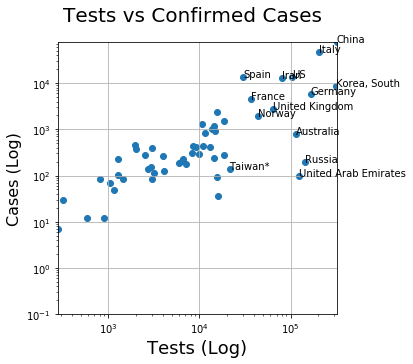

In [79]:
# Plot the cases-axis, tests axis
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(testing_df.Tests, testing_df.Confirmed)

# We do the +1 to avoid having 0 values ona log scale, this +1 will not be used on calculating the correlation value
ax.set_xlim([min(testing_df.Tests)+ 0.1,max(testing_df.Tests) + 0.1])
ax.set_ylim([min(testing_df.Confirmed) + 0.1,max(testing_df.Confirmed) + 0.1])
ax.grid(True)

for i, row in enumerate(testing_df.iterrows()):
    if testing_df.Tests[i] > 2e4:
        ax.annotate(row[0], (testing_df.Tests[i], testing_df.Confirmed[i]))

fig.suptitle('Tests vs Confirmed Cases', fontsize=20)
plt.xlabel('Tests (Log)', fontsize=18)
plt.ylabel('Cases (Log)', fontsize=16)    

# plt.tight_layout()
plt.show()

Although this is not a straight line it seems like it has a linear relationship. The use of a **log-log** plot suggests a power law in the form of $Cases=kTests^n$.  
When a slope on a log-log plot is between 0 and 1, it signifies that the nonlinear effect of the dependent variable lessens as its value increases [(ref)](https://statisticsbyjim.com/regression/log-log-plots/). In our case this means that **as the number of tests increases the rate of discovered cases slows down**.

In [82]:
# Calculate the correaltion value
corr_cases, _ = spearmanr(testing_df.Tests, testing_df.Confirmed)
print('Spearmans correlation: %.3f' % corr_cases)

Spearmans correlation: 0.718


As expected the Spearman's Correlation of **0.718** is big enough to suggest a positive correlation.

### Death Ratio

We let a new variable $deathRatio = \frac{deaths}{cases}$. This variable could be translated as the effectiveness of the health care system of each country, where the smaller the value the more effective.

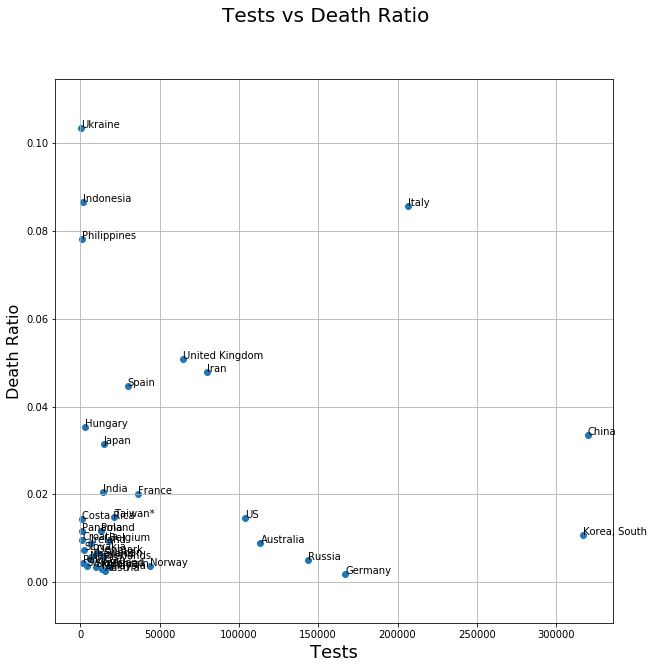

In [130]:
testing_df['DeathRatio'] = testing_df.Deaths / testing_df.Confirmed

testing_df_death_ratio = testing_df[['Tests', 'DeathRatio']].dropna()

testing_df_death_ratio = testing_df_death_ratio[testing_df_death_ratio['DeathRatio'] != np.Inf]
testing_df_death_ratio = testing_df_death_ratio[testing_df_death_ratio['DeathRatio'] != 0]

# Plot the cases-axis, tests axis
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(testing_df_death_ratio.Tests, testing_df_death_ratio.DeathRatio)

ax.grid(True)

for i, row in enumerate(testing_df_death_ratio.iterrows()):
    ax.annotate(row[0], (testing_df_death_ratio.Tests[i], testing_df_death_ratio.DeathRatio[i]))

fig.suptitle('Tests vs Death Ratio', fontsize=20)
plt.xlabel('Tests', fontsize=18)
plt.ylabel('Death Ratio', fontsize=16)    

plt.show()

On the above plot we can see that countries that are performing a lot of testing like Germany, US and South Korea manage to face this epidemic with a little amount of deaths while countries like Ukraine, Indonesia and Philippines that perform a smaller amount of tests have greater number of deaths.  
  
**Correlation or Causality?**  
This is a hard to answer question. Countries like Germany, and Australia have a better economy than Ukraine and Indonesia which plays a major role on the above results. However, one can say that better economy means more testing which means a smaller death ratio. **In conclusion, it seems like performing as much as possible testing will help contain the the number of deaths.**